__Analysis of predictors for the forecast of the Russian labor force until 2030__

## Task overview
1. Identify key variables that influence PC and similar parameters

2. Build linear models (LSDV, Pooled regression) to analyze the impact and prediction of MS by region and in general

3. Assess the quality of each model and describe

4. Predict values for target variable to 2030

# primary analysis

using dual kernel mode with R and Python. In order to compete this taks WLS was used with Ubuntu subsystem

In [9]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.0 MB/s eta 0:00:00a 0:00:01


In [1]:
import pandas as pd
import rpy2

attaching R kernel

In [33]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


testing

In [3]:
%%R
install.packages(c('knitr', 'magrittr', 'dplyr', 'sjPlot'))

* installing *source* package ‘knitr’ ...
** package ‘knitr’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** demo
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (knitr)
* installing *source* package ‘magrittr’ ...
** package ‘magrittr’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0’


gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -ffile-prefix-map=/build/r-base-H8urij/r-base-4.4.0=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c pipe.c -o pipe.o
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -ffile-prefix-map=/build/r-base-H8urij/r-base-4.4.0=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c utils.c -o utils.o
gcc -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -flto=auto -ffat-lto-objects -flto=auto -Wl,-z,relro -o magrittr.so pipe.o utils.o -L/usr/lib/R/lib -lR


installing to /home/chuckles/R/x86_64-pc-linux-gnu-library/4.4/00LOCK-magrittr/00new/magrittr/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (magrittr)
* installing *source* package ‘dplyr’ ...
** package ‘dplyr’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C++ compiler: ‘g++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0’


g++ -std=gnu++17 -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -ffile-prefix-map=/build/r-base-H8urij/r-base-4.4.0=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2   -c chop.cpp -o chop.o
g++ -std=gnu++17 -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -ffile-prefix-map=/build/r-base-H8urij/r-base-4.4.0=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2   -c filter.cpp -o filter.o
g++ -std=gnu++17 -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -ffile-prefix-map=/build/r-base-H8urij/r-base-4.4.0=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2   -c funs.cpp -o funs.o
g++ -std=gnu++17 -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -ffile-prefix-map=/build/r-base-H8urij/r-base-4.4.0=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2   -c group_by.cpp -o group_by.o
g++ -std=gnu++17 -I"/usr/share/R

installing to /home/chuckles/R/x86_64-pc-linux-gnu-library/4.4/00LOCK-dplyr/00new/dplyr/libs
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (dplyr)
* installing *source* package ‘sjPlot’ ...
** package ‘sjPlot’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** test

Installing packages into ‘/home/chuckles/R/x86_64-pc-linux-gnu-library/4.4’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/knitr_1.47.tar.gz'
Content type 'application/x-gzip' length 587962 bytes (574 KB)
downloaded 574 KB

trying URL 'https://cloud.r-project.org/src/contrib/magrittr_2.0.3.tar.gz'
Content type 'application/x-gzip' length 267074 bytes (260 KB)
downloaded 260 KB

trying URL 'https://cloud.r-project.org/src/contrib/dplyr_1.1.4.tar.gz'
Content type 'application/x-gzip' length 1207521 bytes (1.2 MB)
downloaded 1.2 MB

trying URL 'https://cloud.r-project.org/src/contrib/sjPlot_2.8.16.tar.gz'
Content type 'application/x-gzip' length 832637 bytes (813 KB)
downloaded 813 KB


The downloaded source packages are in
	‘/tmp/RtmpFkmOjE/downloaded_packages’
In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packag

In [4]:
%%R
library(knitr)
library(magrittr)
library(dplyr)
library(sjPlot)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [11]:
df = pd.read_excel('panel.xlsx')
#df = df.set_index(['region', 'period'])
df

,region,period,innovation_activity_level_percent,labor_productivity_index_percent,poverty_level_percent,industrial_production_index_percent,construction_work_volume_thousand_rubles,average_per_capita_income_rubles_per_month,employed_population_thousands,employment_level_percent,...,average_cost_of_construction_per_sqm,residential_area_completed_annually_per_1000_population_sqm,investment_in_fixed_assets_excluding_budget_thousand_rubles,current_market_value_residential_buildings_million_rubles,foreign_citizens,elderly_people,elderly_and_teenagers,working_age_population,teenagers,working_population
0,Белгородская область,2018,18.151815,102.8,7.5,102.4,23362304.1,30712.962414,792.637,60.6,...,47772.00,785.0,1.226923e+08,1305087.99,9168,87638,87877,808505,239.0,905550
1,Брянская область,2018,8.243243,104.9,13.6,102.7,5311814.7,26722.337614,586.497,57.2,...,30541.00,334.0,5.132264e+07,727575.99,7233,57610,57725,573102,115.0,638060
2,Владимирская область,2018,13.006135,100.8,13.1,104.6,5663657.5,23343.519683,688.375,58.7,...,31854.99,476.0,6.489180e+07,927909.99,19375,108885,109465,658575,580.0,787415
3,Воронежская область,2018,17.097416,102.7,8.9,103.2,29882520.9,30158.281326,1141.811,57.3,...,32583.00,726.0,2.370329e+08,1364237.99,20373,129570,130041,1222124,471.0,1372538
4,Ивановская область,2018,8.133971,102.3,14.2,102.1,4499339.9,25421.329962,502.984,58.2,...,29309.00,366.0,2.607130e+07,500732.99,7028,51875,52085,488291,210.0,547404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,Амурская область,2022,6.824513,102.6,11.9,102.8,158807105.1,49798.000000,382.853,61.1,...,53775.00,498.0,4.453806e+08,125263.99,40390,36929,37779,444439,850.0,522608
421,Магаданская область,2022,8.552632,95.9,6.7,101.1,15242720.8,101999.000000,80.746,71.2,...,188901.99,85.0,6.778342e+07,429248.99,8244,10120,10122,86113,2.0,104479
422,Сахалинская область,2022,4.848485,93.9,6.3,76.8,68785826.1,79322.000000,261.753,67.1,...,NaN,1088.0,2.340631e+08,94554.99,32963,33278,33597,269388,319.0,335948
423,Еврейская автономная область,2022,3.954802,98.4,18.3,107.0,11158163.2,37753.000000,72.355,58.6,...,NaN,170.0,1.808734e+07,16654.99,2534,6413,6445,77228,32.0,86207


In [9]:
# columns with translations
df.columns.tolist()

['innovation_activity_level_percent',
 'labor_productivity_index_percent',
 'poverty_level_percent',
 'industrial_production_index_percent',
 'construction_work_volume_thousand_rubles',
 'average_per_capita_income_rubles_per_month',
 'employed_population_thousands',
 'employment_level_percent',
 'increase_in_high_productivity_jobs_thousands',
 'goods_and_services_output_index_percent',
 'cars_per_1000_people',
 'active_enterprises',
 'closed_enterprises',
 'freight_turnover_million_ton_km',
 'commercial_freight_turnover_thousand_ton_km',
 'research_and_development_expenditure_percent_GRP',
 'internet_sales_share_percent',
 'retail_trade_per_capita_rubles',
 'total_population_growth',
 'average_annual_population',
 'number_of_births_per_year',
 'age_specific_mortality_rate',
 'life_expectancy_at_birth_years',
 'total_fertility_rate',
 'birth_rate_age_15_19',
 'birth_rate_age_20_24',
 'birth_rate_age_25_29',
 'birth_rate_age_30_34',
 'birth_rate_age_35_39',
 'birth_rate_age_40_44',
 'bir

we used R because it provides easily readable and formattable dummization of variables. In this case factor() will substitute us large number of manipulations

In [12]:
%%R -i df
model <- lm(working_population ~ . + factor(region), data = df)
summary(model)


Call:
lm(formula = working_population ~ . + factor(region), data = df)

Residuals:
       Min         1Q     Median         3Q        Max 
-6.301e-09 -2.490e-10  0.000e+00  2.330e-10  2.256e-09 

Coefficients: (80 not defined because of singularities)
                                                                                                                         Estimate
(Intercept)                                                                                                             8.062e-07
regionАмурская область                                                                                                 -1.949e-08
regionАрхангельская область (кроме Ненецкого автономного округа)                                                       -1.217e-08
regionАстраханская область                                                                                             -2.080e-08
regionБелгородская область                                                                       

In addition: Warning message:
In summary.lm(model) : essentially perfect fit: summary may be unreliable


In [ ]:
%%R
install.packages('pander')

In [14]:
%%R
library(pander)
pander(summary(model))


------------------------------------------------------------------------------
                             &nbsp;                                 Estimate  
----------------------------------------------------------------- ------------
                         **(Intercept)**                           7.746e-07  

                   **regionАмурская область**                      7.991e-09  

                  **regionАрхангельская область                    5.734e-09  
                  (кроме Ненецкого автономного                                
                            округа)**                                         

                 **regionАстраханская область**                    9.795e-09  

                 **regionБелгородская область**                    6.658e-09  

                   **regionБрянская область**                      7.394e-09  

                 **regionВладимирская область**                    6.643e-09  

                      **regionВолгоградская 

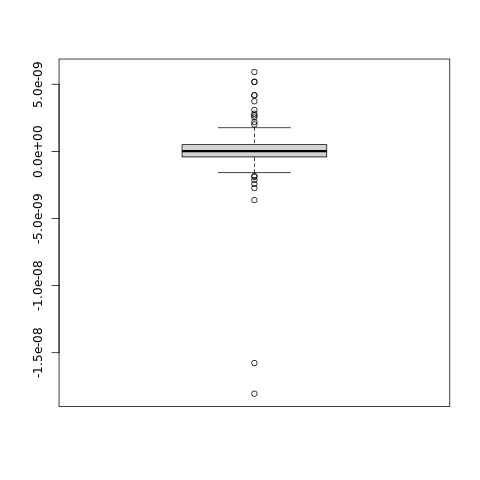

In [15]:
%%R
boxplot(model$residuals)

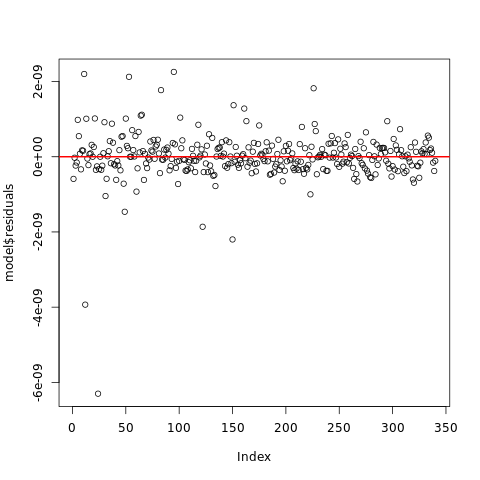

In [18]:
%%R
plot(model$residuals)
mean_residuals = model$residuals
abline(h = 0, col = "red", lwd = 2)

so, based on R^2, standard error and T we can concluse that yes, it is a good model in terms of fitting but it has a lot of noise which does not satisfy our conditions

In [19]:
!pip install scikit-learn linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 10.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 10.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.8 MB/s eta 0:00:00


In [17]:
print(df.describe)

<bound method NDFrame.describe of                            region  period  innovation_activity_level_percent  \
0            Белгородская область    2018                          18.151815   
1                Брянская область    2018                           8.243243   
2            Владимирская область    2018                          13.006135   
3             Воронежская область    2018                          17.097416   
4              Ивановская область    2018                           8.133971   
..                            ...     ...                                ...   
420              Амурская область    2022                           6.824513   
421           Магаданская область    2022                           8.552632   
422           Сахалинская область    2022                           4.848485   
423  Еврейская автономная область    2022                           3.954802   
424    Чукотский автономный округ    2022                           7.471264   

     

In [18]:
df = df.set_index(['region', 'period'])
df

,,innovation_activity_level_percent,labor_productivity_index_percent,poverty_level_percent,industrial_production_index_percent,construction_work_volume_thousand_rubles,average_per_capita_income_rubles_per_month,employed_population_thousands,employment_level_percent,increase_in_high_productivity_jobs_thousands,goods_and_services_output_index_percent,...,average_cost_of_construction_per_sqm,residential_area_completed_annually_per_1000_population_sqm,investment_in_fixed_assets_excluding_budget_thousand_rubles,current_market_value_residential_buildings_million_rubles,foreign_citizens,elderly_people,elderly_and_teenagers,working_age_population,teenagers,working_population
region,period,,,,,,,,,,,,,,,,,,,,,
Белгородская область,2018,18.151815,102.8,7.5,102.4,23362304.1,30712.962414,792.637,60.6,33.700,102.8,...,47772.00,785.0,1.226923e+08,1305087.99,9168,87638,87877,808505,239.0,905550
Брянская область,2018,8.243243,104.9,13.6,102.7,5311814.7,26722.337614,586.497,57.2,12.300,101.9,...,30541.00,334.0,5.132264e+07,727575.99,7233,57610,57725,573102,115.0,638060
Владимирская область,2018,13.006135,100.8,13.1,104.6,5663657.5,23343.519683,688.375,58.7,23.900,105.2,...,31854.99,476.0,6.489180e+07,927909.99,19375,108885,109465,658575,580.0,787415
Воронежская область,2018,17.097416,102.7,8.9,103.2,29882520.9,30158.281326,1141.811,57.3,48.700,102.8,...,32583.00,726.0,2.370329e+08,1364237.99,20373,129570,130041,1222124,471.0,1372538
Ивановская область,2018,8.133971,102.3,14.2,102.1,4499339.9,25421.329962,502.984,58.2,12.400,102.1,...,29309.00,366.0,2.607130e+07,500732.99,7028,51875,52085,488291,210.0,547404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Амурская область,2022,6.824513,102.6,11.9,102.8,158807105.1,49798.000000,382.853,61.1,3.683,104.1,...,53775.00,498.0,4.453806e+08,125263.99,40390,36929,37779,444439,850.0,522608
Магаданская область,2022,8.552632,95.9,6.7,101.1,15242720.8,101999.000000,80.746,71.2,1.955,113.5,...,188901.99,85.0,6.778342e+07,429248.99,8244,10120,10122,86113,2.0,104479
Сахалинская область,2022,4.848485,93.9,6.3,76.8,68785826.1,79322.000000,261.753,67.1,13.969,85.3,...,188901.99,1088.0,2.340631e+08,94554.99,32963,33278,33597,269388,319.0,335948


In [19]:
import pandas as pd
import statsmodels.api as sm
from linearmodels.panel import PanelOLS, RandomEffects

y = df['working_population']
X = df[df.columns.tolist()[:-1]]
X = sm.add_constant(X)

In [25]:
coef_matrix_simple = df.corr()
coef_matrix_simple

,innovation_activity_level_percent,labor_productivity_index_percent,poverty_level_percent,industrial_production_index_percent,construction_work_volume_thousand_rubles,average_per_capita_income_rubles_per_month,employed_population_thousands,employment_level_percent,increase_in_high_productivity_jobs_thousands,goods_and_services_output_index_percent,...,average_cost_of_construction_per_sqm,residential_area_completed_annually_per_1000_population_sqm,investment_in_fixed_assets_excluding_budget_thousand_rubles,current_market_value_residential_buildings_million_rubles,foreign_citizens,elderly_people,elderly_and_teenagers,working_age_population,teenagers,working_population
innovation_activity_level_percent,1.000000,0.023238,-0.347079,0.009967,0.144239,-0.063655,0.312834,0.186985,0.306216,-0.015296,...,-0.115048,0.147660,0.140122,0.230164,0.174867,0.292709,0.292935,0.281178,0.084565,0.277632
labor_productivity_index_percent,0.023238,1.000000,0.026556,0.429813,0.050096,-0.036001,0.021861,0.004283,0.154935,0.325597,...,-0.040633,-0.122789,0.058593,0.030446,0.068217,0.036594,0.036897,0.019087,0.048756,0.024360
poverty_level_percent,-0.347079,0.026556,1.000000,0.002459,-0.395884,-0.560302,-0.372856,-0.595389,-0.234372,-0.167508,...,-0.126514,-0.274634,-0.379499,-0.330219,-0.317689,-0.349785,-0.349749,-0.345782,-0.088499,-0.347925
industrial_production_index_percent,0.009967,0.429813,0.002459,1.000000,0.114609,-0.030535,0.112436,-0.031086,0.087446,0.378368,...,-0.111019,0.055051,0.130394,0.133724,0.155327,0.136837,0.136631,0.113086,-0.006437,0.119392
construction_work_volume_thousand_rubles,0.144239,0.050096,-0.395884,0.114609,1.000000,0.467606,0.778110,0.417113,0.575895,0.069023,...,0.125277,0.189761,0.950745,0.837242,0.841756,0.763086,0.762303,0.788178,0.014073,0.798562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
elderly_people,0.292709,0.036594,-0.349785,0.136837,0.763086,0.187353,0.974691,0.235756,0.740239,0.017615,...,-0.026621,0.197705,0.815095,0.896307,0.904924,1.000000,0.999986,0.968021,0.177057,0.976921
elderly_and_teenagers,0.292935,0.036897,-0.349749,0.136631,0.762303,0.186258,0.974725,0.235146,0.739927,0.017247,...,-0.027279,0.197051,0.814462,0.895615,0.904151,0.999986,1.000000,0.968085,0.181856,0.976922
working_age_population,0.281178,0.019087,-0.345782,0.113086,0.788178,0.182688,0.990618,0.202330,0.716756,0.005085,...,-0.034029,0.188908,0.836072,0.896276,0.866373,0.968021,0.968085,1.000000,0.188484,0.998720
teenagers,0.084565,0.048756,-0.088499,-0.006437,0.014073,-0.135236,0.180167,-0.044442,0.074000,-0.046563,...,-0.145276,-0.042950,0.058341,0.045243,0.033083,0.177057,0.181856,0.188484,1.000000,0.178803


In [28]:
coef_matrix_simple.to_excel('correlation_matrix.xlsx', index=False)

we can't easily plot collerogram so we can make initial estimations for pearson's correlation in excel and check correlation estimations with *color sclaes* tool

We can expect multicoleniarity problem with our variables but it does not matter for now. Target is to choose best parameters to target variable


In [21]:
model_fe = PanelOLS(y, X, entity_effects=True, check_rank=False, drop_absorbed=True)
results_fe = model_fe.fit()
print(results_fe.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:     working_population   R-squared:                        1.0000
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                 425   R-squared (Within):               1.0000
Date:                Mon, May 27 2024   R-squared (Overall):              1.0000
Time:                        09:24:53   Log-likelihood                    8382.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   3.747e+28
Entities:                          84   P-value                           0.0000
Avg Obs:                       5.0595   Distribution:                  F(88,253)
Min Obs:                       5.0000                                           
Max Obs:                      10.0000   F-statistic (robust):          3.747e+28
                            

In [22]:
model_re = RandomEffects(y, X, check_rank=False)
results_re = model_re.fit()
print(results_re.summary)

                        RandomEffects Estimation Summary                        
Dep. Variable:     working_population   R-squared:                        1.0000
Estimator:              RandomEffects   R-squared (Between):              1.0000
No. Observations:                 425   R-squared (Within):               1.0000
Date:                Mon, May 27 2024   R-squared (Overall):              1.0000
Time:                        09:25:22   Log-likelihood                    8705.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   6.859e+31
Entities:                          84   P-value                           0.0000
Avg Obs:                       5.0595   Distribution:                  F(88,336)
Min Obs:                       5.0000                                           
Max Obs:                      10.0000   F-statistic (robust):          6.859e+31
                            

In [23]:
from linearmodels.panel import compare

comparison = compare({'Fixed Effects': results_fe, 'Random Effects': results_re})
print(comparison)


                                               Model Comparison                                              
                                                                         Fixed Effects         Random Effects
-------------------------------------------------------------------------------------------------------------
Dep. Variable                                                       working_population     working_population
Estimator                                                                     PanelOLS          RandomEffects
No. Observations                                                                   425                    425
Cov. Est.                                                                   Unadjusted             Unadjusted
R-squared                                                                       1.0000                 1.0000
R-Squared (Within)                                                              1.0000                 1.0000
R-Squared 

we have tested random and fixed effect models. We can conclude that there's no significant difference


Let us now get the best parameters for target with __LASSO regression__

In [28]:
df = pd.read_excel('panel.xlsx')
df = df.set_index(['region', 'period'])
df = df.ffill()
dy = df['working_population']
X = df[df.columns.tolist()[:-1]]
X = sm.add_constant(X)

In [29]:
from sklearn.linear_model import LassoCV
import numpy as np

X_np = X.values
y_np = y.values

lasso = LassoCV(cv=5).fit(X_np, y_np)
print(f"Selected variables: {np.where(lasso.coef_ != 0)[0]}")
print(f"Lasso coefficients: {lasso.coef_}")


Selected variables: [ 5 20 82 83]
Lasso coefficients: [ 0.          0.         -0.         -0.          0.         -0.00035393
 -0.          0.         -0.          0.         -0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.19817268  0.          0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.         -0.          0.
  0.         -0.          0.         -0.          0.          0.
  0.          0.          0.         -0.          0.          0.
 -0.          0.         -0.          0.         -0.          0.
  0.          0.          0.          0.         -0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.          0.00166522  0.04607048
  0.          0.    

In [30]:
sample = pd.DataFrame({
    'columns' : df.columns.tolist(),
    'Lasso coef' : lasso.coef_
})
sample

,columns,Lasso coef
0,innovation_activity_level_percent,0.0
1,labor_productivity_index_percent,0.0
2,poverty_level_percent,-0.0
3,industrial_production_index_percent,-0.0
4,construction_work_volume_thousand_rubles,0.0
...,...,...
84,elderly_people,0.0
85,elderly_and_teenagers,0.0
86,working_age_population,0.0
87,teenagers,0.0


In [31]:
sub_sample = sample.loc[sample['Lasso coef'] != 0]
cols_of_interest = sub_sample['columns'].tolist()
cols_of_interest

['average_per_capita_income_rubles_per_month',
 'number_of_births_per_year',
 'current_market_value_residential_buildings_million_rubles',
 'foreign_citizens']

In [43]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.9/160.9 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 10.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 3.5 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 8.8 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.4 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 9.2 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 4.4 MB/s eta 0:00:0000:01


<Axes: >

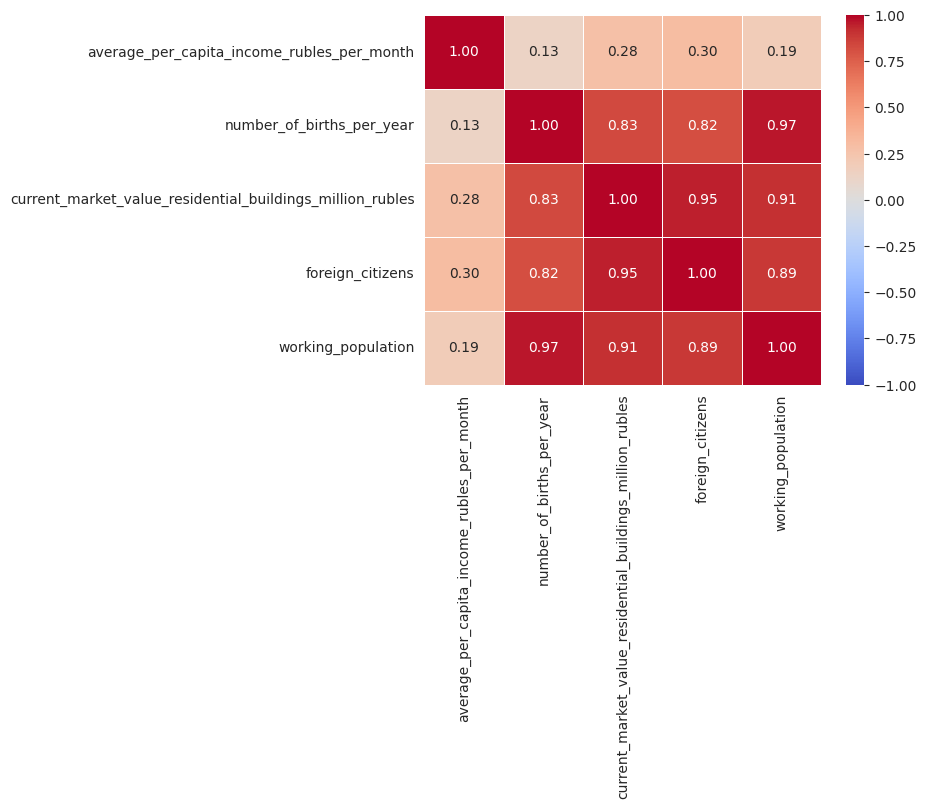

In [36]:
import seaborn as sns
lr_df = df[cols_of_interest + ['working_population']]
corr_matrix = df[cols_of_interest + ['working_population']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

With LASSO we have got best set of predictors such as:
['average_per_capita_income_rubles_per_month',
 'number_of_births_per_year',
 'current_market_value_residential_buildings_million_rubles',
 'foreign_citizens']
 
Let us plot collerations in order to get better picture


In [ ]:
%%R
install.packages(c('plm'))

In [32]:
cols_of_interest

['average_per_capita_income_rubles_per_month',
 'number_of_births_per_year',
 'current_market_value_residential_buildings_million_rubles',
 'foreign_citizens']

R[write to console]: In addition: 
R[write to console]: There were 17 warnings (use warnings() to see them)
R[write to console]: 



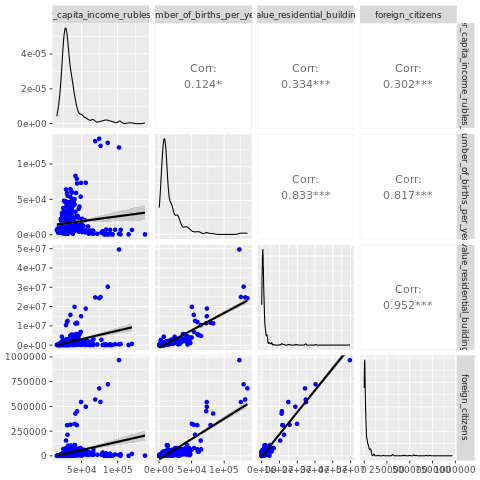

In [60]:
%%R -i cols_of_interest
library(dplyr)
library(GGally)
library(readxl)

df_sample = df[, cols_of_interest]
corplot = ggpairs(df_sample,
                  lower = list(continuous = wrap("smooth_lm", color = 'blue')))
corplot

In [39]:
lr_df = lr_df.reset_index()
lr_df = lr_df.ffill()
lr_df

,index,region,period,average_per_capita_income_rubles_per_month,number_of_births_per_year,current_market_value_residential_buildings_million_rubles,foreign_citizens,working_population
0,0,Белгородская область,2018,30712.962414,14316.99,1305087.99,9168,905550
1,1,Брянская область,2018,26722.337614,11128.99,727575.99,7233,638060
2,2,Владимирская область,2018,23343.519683,12692.99,927909.99,19375,787415
3,3,Воронежская область,2018,30158.281326,21469.99,1364237.99,20373,1372538
4,4,Ивановская область,2018,25421.329962,9117.00,500732.99,7028,547404
...,...,...,...,...,...,...,...,...
420,420,Амурская область,2022,49798.000000,6942.00,125263.99,40390,522608
421,421,Магаданская область,2022,101999.000000,1173.00,429248.99,8244,104479
422,422,Сахалинская область,2022,79322.000000,4950.00,94554.99,32963,335948
423,423,Еврейская автономная область,2022,37753.000000,1418.00,16654.99,2534,86207


In [68]:
%%R -i lr_df
library(plm)
model = plm(working_population ~ average_per_capita_income_rubles_per_month + number_of_births_per_year + current_market_value_residential_buildings_million_rubles + foreign_citizens, data = lr_df, model='pooling')
summary(model)


Pooling Model

Call:
plm(formula = working_population ~ average_per_capita_income_rubles_per_month + 
    number_of_births_per_year + current_market_value_residential_buildings_million_rubles + 
    foreign_citizens, data = lr_df, model = "pooling")

Balanced Panel: n = 84, T = 5, N = 425

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-1104011   -65203    16323    91959  1185213 

Coefficients:
                                                            Estimate Std. Error
(Intercept)                                               4.7534e+04 3.0616e+04
average_per_capita_income_rubles_per_month                3.1810e-01 6.9250e-01
number_of_births_per_year                                 4.6872e+01 1.0981e+00
current_market_value_residential_buildings_million_rubles 9.5196e-02 9.4904e-03
foreign_citizens                                          8.3025e-01 3.9426e-01
                                                          t-value Pr(>|t|)    
(Intercept)                     

In addition: Warning message:
In pdata.frame(data, index = index, ...) :
  duplicate couples (id-time) in resulting pdata.frame
 to find out which, use, e.g., table(index(your_pdataframe), useNA = "ifany")


In [70]:
%%R -i lr_df
library(plm)
model = lm(working_population ~ average_per_capita_income_rubles_per_month + number_of_births_per_year + current_market_value_residential_buildings_million_rubles + foreign_citizens + factor(region), data = lr_df)
summary(model)


Call:
lm(formula = working_population ~ average_per_capita_income_rubles_per_month + 
    number_of_births_per_year + current_market_value_residential_buildings_million_rubles + 
    foreign_citizens + factor(region), data = lr_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-405260   -7975     206    7488  444160 

Coefficients:
                                                                                                                         Estimate
(Intercept)                                                                                                             1.297e+06
average_per_capita_income_rubles_per_month                                                                             -1.209e-01
number_of_births_per_year                                                                                              -9.831e-01
current_market_value_residential_buildings_million_rubles                                                               3.949e-03
foreign_

According linear model parameters we can conclude that the model may be the best for these set of parameters. Let us predict now

In [43]:
%%R -i lr_df
library(plm)
model = plm(working_population ~ average_per_capita_income_rubles_per_month + number_of_births_per_year + current_market_value_residential_buildings_million_rubles + foreign_citizens, data = lr_df, model='pooling')
summary(model)

Pooling Model

Call:
plm(formula = working_population ~ average_per_capita_income_rubles_per_month + 
    number_of_births_per_year + current_market_value_residential_buildings_million_rubles + 
    foreign_citizens, data = lr_df, model = "pooling")

Unbalanced Panel: n = 425, T = 1-1, N = 425

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-1104011   -65203    16323    91959  1185213 

Coefficients:
                                                            Estimate Std. Error
(Intercept)                                               4.7534e+04 3.0616e+04
average_per_capita_income_rubles_per_month                3.1810e-01 6.9250e-01
number_of_births_per_year                                 4.6872e+01 1.0981e+00
current_market_value_residential_buildings_million_rubles 9.5196e-02 9.4904e-03
foreign_citizens                                          8.3025e-01 3.9426e-01
                                                          t-value Pr(>|t|)    
(Intercept)                